<a href="https://colab.research.google.com/github/Chandan801/Dr.Proton/blob/master/Standard%20and%20Normal%20scaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
df=sns.load_dataset("titanic")
df.head()
df.keys()


Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [3]:
df2=df[['survived', 'pclass', 'age', 'parch']]
df2.head()

,survived,pclass,age,parch
0,0,3,22.0,0
1,1,1,38.0,0
2,1,3,26.0,0
3,1,1,35.0,0
4,0,3,35.0,0


In [4]:
df_cleaned_data=df2.fillna(df2.mean())

In [5]:
df_cleaned_data.isnull().sum()

survived    0
pclass      0
age         0
parch       0
dtype: int64

In [6]:
X=df_cleaned_data.drop("survived",axis=1)
y=df_cleaned_data["survived"]
print(X.shape)
y.shape

(891, 3)


(891,)

In [8]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=51)

## Standard Scaler

In [9]:
sc=StandardScaler()
sc.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [11]:
sc.mean_

array([ 2.30617978, 29.55409121,  0.39185393])

In [ ]:
X_train.describe()

In [15]:
X_train_sc=sc.transform(X_train)
X_test_sc=sc.transform(X_test)

In [18]:
X_train.keys()

Index(['pclass', 'age', 'parch'], dtype='object')

In [19]:
X_train_sc_df=pd.DataFrame(X_train_sc,columns=['pclass', 'age', 'parch'])
X_test_sc_df=pd.DataFrame(X_test_sc,columns=['pclass', 'age', 'parch'])

In [31]:
X_train_sc_df.describe().round(2)

,pclass,age,parch
count,712.00,712.00,712.00
mean,0.00,0.00,0.00
std,1.00,1.00,1.00
min,-1.55,-2.24,-0.49
25%,-0.66,-0.58,-0.49
50%,0.82,0.01,-0.49
75%,0.82,0.42,-0.49
max,0.82,3.19,5.79


## MinMax Scaler

In [24]:
mmc=MinMaxScaler()
mmc.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [26]:
X_train_mmc=mmc.transform(X_train)
X_test_mmc=mmc.transform(X_test)

In [27]:
X_train_mmc_df=pd.DataFrame(X_train_mmc,columns=['pclass', 'age', 'parch'])
X_test_mmc_df=pd.DataFrame(X_test_mmc,columns=['pclass', 'age', 'parch'])

In [33]:
X_train_mmc_df.describe().round(2)

,pclass,age,parch
count,712.00,712.00,712.00
mean,0.65,0.41,0.08
std,0.42,0.18,0.16
min,0.00,0.00,0.00
25%,0.38,0.31,0.00
50%,1.00,0.41,0.00
75%,1.00,0.49,0.00
max,1.00,1.00,1.00


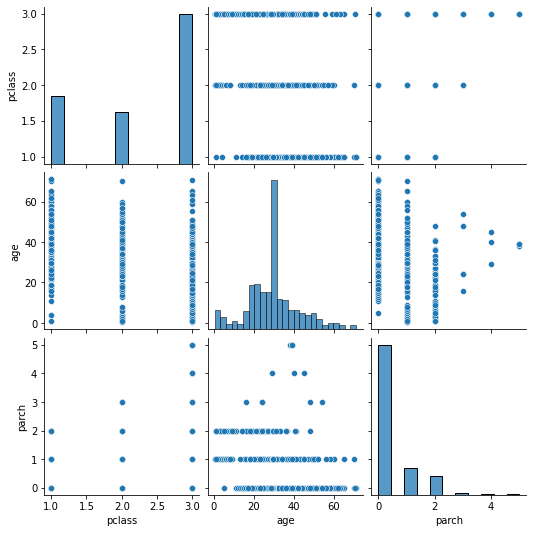

In [34]:
sns.pairplot(X_train)

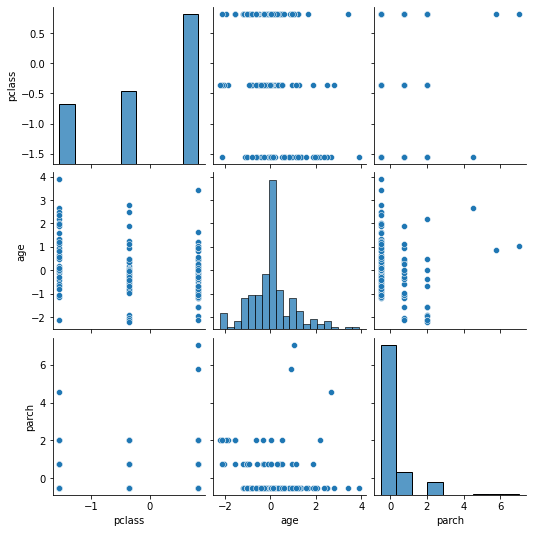

In [37]:
sns.pairplot(X_test_sc_df)

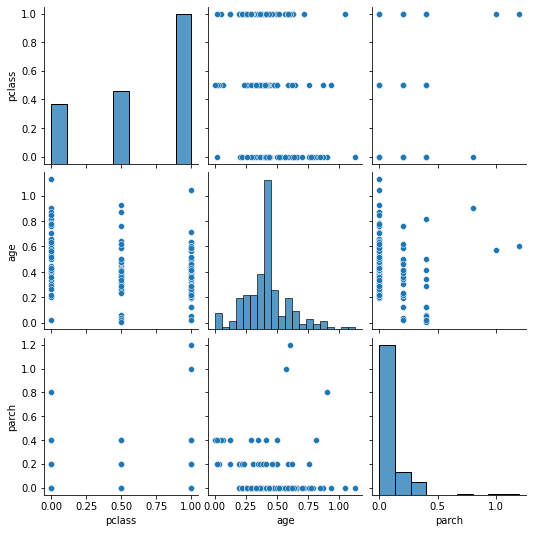

In [38]:
sns.pairplot(X_test_mmc_df)